# Óptica Geométrica

In [7]:
%matplotlib notebook
#%matplotlib inline

from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [37]:
def focosConj(f,do):
    xo=do-f
    xi=f/xo
    di=f+xi
    A=-di/do
    return di,A

In [38]:
fc=1
dObj=1.5
dIm,Amp =focosConj(fc,dObj)
print "DObj=%g, DIm=%g, Ampl=%g" %(dObj,dIm,Amp )

DObj=1.5, DIm=3, Ampl=-2


<IPython.core.display.Javascript object>


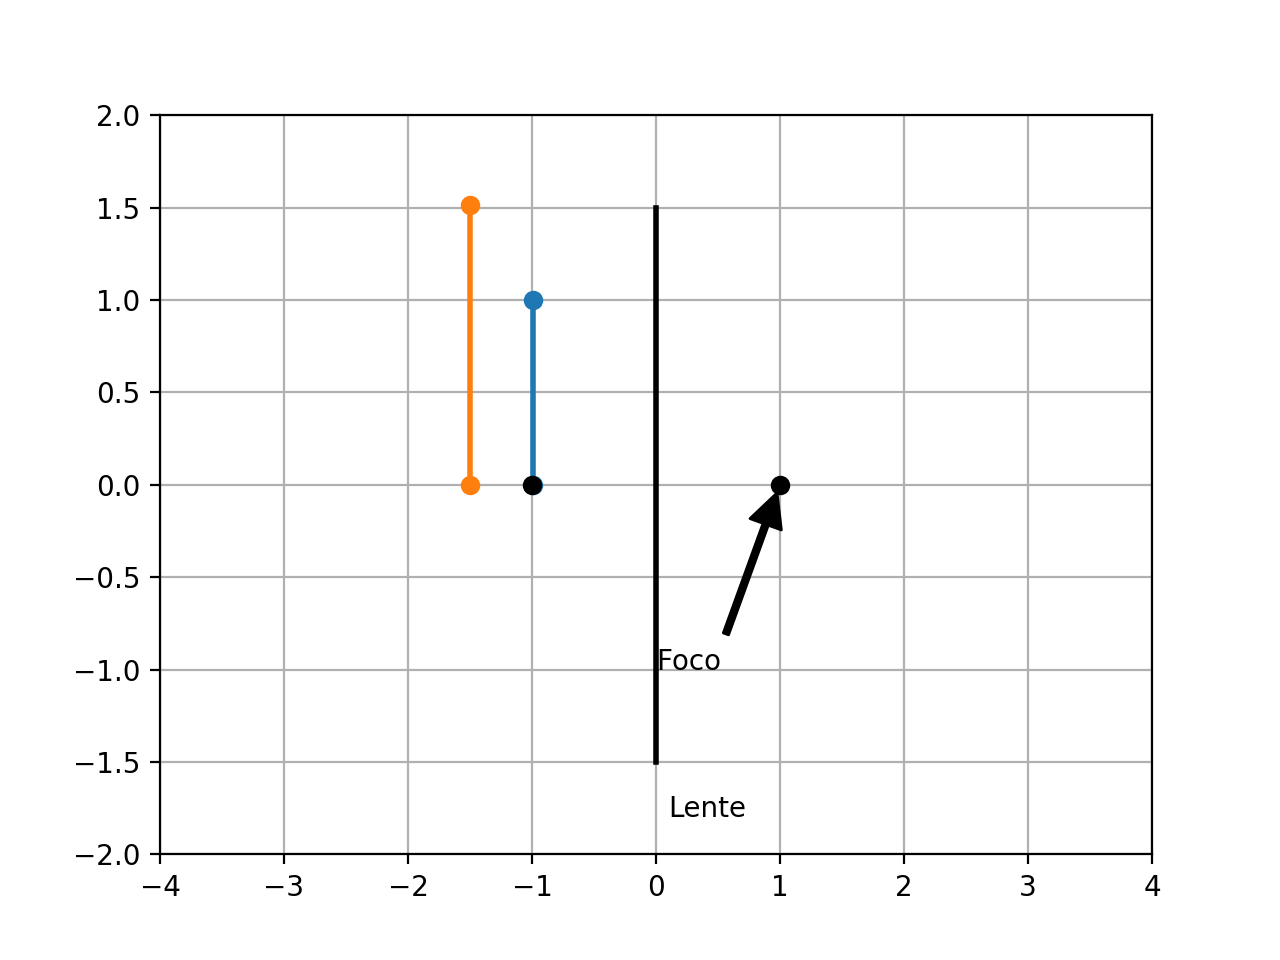

A Jupyter Widget

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-4, 4), ylim=(-2, 2))
ax.grid()

lineO, = ax.plot([], [], '-o', lw=2)
lineI, = ax.plot([], [], '-o', lw=2)
ax.text(0.1, -1.8, r'Lente', fontsize=10)

#distancia focal
f=-1.0
line1, = ax.plot([0,0], [-1.5, 1.5], 'k-', lw=2)
ax.plot([f,-f], [0,0], 'ko')
ax.annotate(r'Foco', xy=(-f, 0), xytext=(-(f+1), -1),
            arrowprops=dict(facecolor='black',width =2, shrink=0.05))


def plotImage(do):
#    thisx = [0, 0]
#    thisy = [-1.9, 1.9]
#    line1.set_data(thisx, thisy)
    thisx = [-do, -do]
    thisy = [0, 1]
    lineO.set_data(thisx, thisy)
    di,A =focosConj(f,do)
    thisx = [di, di]
    thisy = [0, A]
    lineI.set_data(thisx, thisy)
    fig.show()

widgets.interact(plotImage, do=(0.1,4.0,0.001));

['', ' ', 'None', '--', '-.', '-', ':']